<a href="https://colab.research.google.com/github/mofanchang/ptt-Word-Embedding-sentiment-analysis/blob/main/%E6%96%87%E5%AD%97%E9%9B%B2_2ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os.path                  # 系統功能模組
import numpy                    # 分析模組
import requests                 # 網路模組
from collections import Counter # 次數統計模組

from google.colab import files  # colab檔案處理模組
from bs4 import BeautifulSoup   # 網頁解析模組
from PIL import Image           # 圖片處理模組
import jieba                    # 分詞模組
import matplotlib.pyplot as plt # 視覺化模組
import wordcloud                # 文字雲模組

In [ ]:
content = open('/content/drive/MyDrive/Colab Notebooks/wordcloud/lifeismoney-1.txt','rb').read()

In [ ]:
dict_path=('/content/drive/MyDrive/Colab Notebooks/wordcloud/mydict.txt','rb')
jieba.load_userdict(dict_path)

Building prefix dict from the default dictionary ...
DEBUG:jieba:Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
DEBUG:jieba:Dumping model to file cache /tmp/jieba.cache
Loading model cost 1.628 seconds.
DEBUG:jieba:Loading model cost 1.628 seconds.
Prefix dict has been built successfully.
DEBUG:jieba:Prefix dict has been built successfully.


In [ ]:
seg_list = jieba.cut(content) # 使用jieba這個library對文檔內容進行分詞
counts={}
for word in seg_list:
    if len(word) <= 1: # 排除單個字
        continue
    elif word.isdigit(): # 排除數字
        continue
    else:
        counts[word] = counts.get(word, 0) + 1

for i in seg_list:
    if i in counts:
        counts[i] +=1
    else:
        counts[i] = 1
print(counts)

{'文章': 1, '名稱': 1, '標題': 1918, '情報': 1772, '花蓮': 1, '捐血': 36, '全聯禮券': 14, '春聯': 7, 'Re': 131, 'iHe': 7, 'rb': 15, '年底': 6, '清倉': 3, '雷亞': 1, 'Cytus': 1, 'II': 6, '手機': 4, '音樂遊戲': 1, '限免': 2, 'Line': 64, 'Point': 23, 'Zendure': 1, '10000mAh': 1, 'PD': 2, '充行動': 1, '電源': 4, '屏東': 4, 'SONY': 3, '春遊趣': 1, '百萬好': 1, '禮歡慶': 1, '即日': 1, '新聞': 59, '日起': 7, '汽油': 10, '0.3': 3, '柴油': 17, '0.2': 5, 'JCB': 1, '蝦皮': 46, '折扣': 41, 'OP': 9, '好康': 8, '飲料': 11, '5P': 1, '兌換': 13, '咖啡': 55, '廣場': 2, 'TP300': 2, '露天': 22, 'Ubereats': 2, '開春太好': 1, 'GoShare': 11, '騎乘金': 14, '喜之坊': 1, '圓片': 1, '牛軋': 1, '夾心餅': 1, 'yahoo': 7, 'New': 8, 'Balance': 7, 'UXC72EA': 2, '遠傳幣': 1, '帳單': 1, '折抵': 4, '新制': 1, '登入': 5, '指定': 28, '遊戲': 3, '三天': 3, '最高': 24, '50LP': 2, 'G304': 2, '無線': 11, '滑鼠': 3, '購物': 37, 'adidas': 6, '跑鞋': 10, 'Yoxi': 1, '台灣': 6, '加油': 5, '合利': 1, '他命': 4, 'EXplus': 1, '小時': 2, '限時價': 1, 'iPhone': 8, '換電池': 2, '特價': 72, 'pchome': 13, '中午': 1, '清空': 1, '購物車': 1, '加碼': 11, '4%': 4, 'COSTCO': 1, '線上': 8

In [ ]:
WORDS_PATH = 'dict.txt.big.txt' # 繁體中文詞庫檔名
TC_FONT_PATH = 'NotoSansTC-Regular.otf' # 繁體中文字型檔名
# 上傳詞庫檔
if not os.path.isfile(WORDS_PATH):
  print(f'找不到詞庫檔{WORDS_PATH}，請上傳詞庫檔：')
  uploaded = files.upload()

# 上傳中文字型檔
if not os.path.isfile(TC_FONT_PATH):
  print(f'找不到中文字型檔{TC_FONT_PATH}，請上傳詞庫檔：')
  uploaded = files.upload()

找不到詞庫檔dict.txt.big.txt，請上傳詞庫檔：


Saving dict.txt.big.txt to dict.txt.big.txt
找不到中文字型檔NotoSansTC-Regular.otf，請上傳詞庫檔：


Saving NotoSansCJKsc-Regular.otf to NotoSansCJKsc-Regular.otf


In [ ]:
# 文字雲格式設定
wc = wordcloud.WordCloud(background_color='white',
                         margin=2, # 文字間距
                         font_path='/content/drive/MyDrive/Colab Notebooks/wordcloud/NotoSansCJKsc-Regular.otf', # 設定字體
                         max_words=30, # 取多少文字在裡面
                         width=1280, height=720) # 解析度

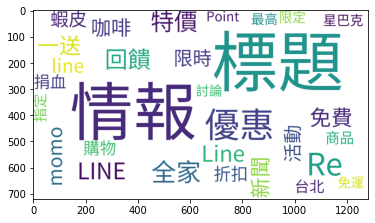

In [ ]:
# 生成文字雲
wc.generate_from_frequencies(counts) # 吃入次數字典資料

# 產生圖檔
wc.to_file('WordCloud-2.png')

# 顯示文字雲圖片
plt.imshow(wc)

In [ ]:
import jieba

jieba.load_userdict('/content/drive/MyDrive/Colab Notebooks/wordcloud/mydict.txt')

s = open('/content/drive/MyDrive/Colab Notebooks/wordcloud/lifeismoney-1.txt','rb').read()

s1_list = jieba.cut(s, cut_all = True)
s2_list = jieba.cut(s, cut_all = False)
s3_list = jieba.cut(s)
s4_list = jieba.cut_for_search(s)

In [ ]:
word_count={}
for i in s3_list:
    if i in word_count:
        word_count[i] += 1
    else:
        word_count[i] = 1
word_count

{'文章': 1,
 '名稱': 1,
 '\n': 1918,
 '標題': 1918,
 ':': 2078,
 ' ': 6191,
 '[': 1878,
 '情報': 1772,
 ']': 1874,
 '12': 160,
 '/': 405,
 '11': 147,
 '「': 39,
 '花蓮': 1,
 '」': 37,
 '捐血': 36,
 '送': 134,
 '全聯禮券': 14,
 '400': 13,
 '+': 113,
 '春聯': 7,
 'Re': 131,
 'iHe': 7,
 'rb': 15,
 '年底': 6,
 '清倉': 3,
 '低': 2,
 '至': 12,
 '4': 47,
 '折': 139,
 '！': 39,
 '雷亞': 1,
 'Cytus': 1,
 'II': 6,
 '手機': 5,
 '音樂遊戲': 1,
 '限免': 2,
 'Line': 67,
 'Point': 25,
 '15': 22,
 'Zendure': 1,
 '10000mAh': 1,
 'PD': 2,
 '快': 8,
 '充行動': 1,
 '電源': 4,
 '$': 235,
 '911': 1,
 '10': 117,
 '29': 4,
 '屏東': 4,
 '烤': 2,
 '鴨': 2,
 'SONY': 3,
 '春遊趣': 1,
 '百萬好': 1,
 '禮歡慶': 1,
 '即日': 1,
 '2': 102,
 '月': 51,
 '日': 33,
 '新聞': 59,
 '明': 18,
 '（': 35,
 '17': 14,
 '）': 32,
 '日起': 7,
 '汽油': 10,
 '↓': 3,
 '0.3': 3,
 '柴油': 17,
 '0.2': 5,
 'JCB': 1,
 '蝦皮': 61,
 '折扣': 41,
 '碼': 22,
 '，': 35,
 '滿': 50,
 '3000': 2,
 '450': 1,
 'OP': 9,
 '【': 26,
 '好康': 8,
 '飲料': 11,
 '】': 26,
 '5P': 1,
 '兌換': 13,
 '咖啡': 55,
 '廣場': 2,
 'TP300': 2,
 '露天': 22,
 '7': 

In [ ]:
del_words_path = '/content/drive/MyDrive/Colab Notebooks/wordcloud/delete_words.txt'


In [ ]:
del_words_list = []

In [ ]:
with open(del_words_path, 'r', encoding='utf-8') as f:
    for line in f.readlines():
        del_words_list.append(line.replace('\n',''))

In [ ]:
del_words_list

['文章 名稱']

In [ ]:
word_list = []
for k in word_count:
    if len(k) > 1 and k not in del_words_list:
        word_list.append((k,word_count[k]))

In [ ]:
word_list.sort(key= lambda x: x[1], reverse=True)
word_list
word=dict(word_list)
word
with open('/content/drive/MyDrive/Colab Notebooks/wordcloud/word_list.txt', 'w') as f:
    for key, value in word.items():
        f.write(f'{key}:{value}\n')

In [ ]:
WORDS_PATH = 'dict.txt.big.txt' # 繁體中文詞庫檔名
TC_FONT_PATH = 'NotoSansTC-Regular.otf' # 繁體中文字型檔名
# 上傳詞庫檔
if not os.path.isfile(WORDS_PATH):
  print(f'找不到詞庫檔{WORDS_PATH}，請上傳詞庫檔：')
  uploaded = files.upload()

# 上傳中文字型檔
if not os.path.isfile(TC_FONT_PATH):
  print(f'找不到中文字型檔{TC_FONT_PATH}，請上傳詞庫檔：')
  uploaded = files.upload()

找不到中文字型檔NotoSansTC-Regular.otf，請上傳詞庫檔：


Saving NotoSansCJKsc-Regular.otf to NotoSansCJKsc-Regular (1).otf


In [ ]:
# 文字雲格式設定
wc = wordcloud.WordCloud(background_color='white',
                         margin=2, # 文字間距
                         font_path='/content/drive/MyDrive/Colab Notebooks/wordcloud/NotoSansCJKsc-Regular.otf', # 設定字體
                         max_words=40, # 取多少文字在裡面
                         width=1280, height=720) # 解析度

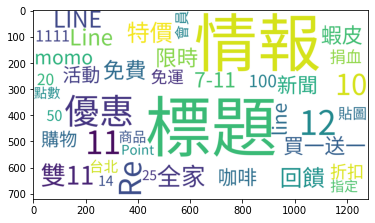

In [ ]:
# 生成文字雲
wc.generate_from_frequencies(word) # 吃入次數字典資料

# 產生圖檔
wc.to_file('Lifeismoney-2.png')

# 顯示文字雲圖片
plt.imshow(wc)

In [ ]:
import numpy as np
from PIL import Image
mask = np.array(Image.open("/content/drive/MyDrive/Colab Notebooks/wordcloud/taiwan.png"))

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

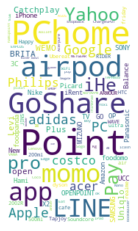

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Read the whole text.
txtfile = "/content/drive/MyDrive/Colab Notebooks/wordcloud/word_list.txt"  # 剛才下載存的文字檔
pngfile = "/content/drive/MyDrive/Colab Notebooks/wordcloud/taiwan.png"  # 剛才下載存的底圖
text = open(txtfile,"r",encoding="utf-8").read()
alice_mask = np.array(Image.open(pngfile))

# Generate a word cloud image
wordcloud = WordCloud(background_color="white", mask=alice_mask, contour_width=3, contour_color='steelblue').generate(text)

# 繪圖
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
font_path='/content/drive/MyDrive/Colab Notebooks/wordcloud/NotoSansCJKsc-Regular.otf'

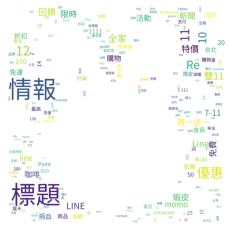

In [ ]:
import imageio
back_color = imageio.imread('/content/drive/MyDrive/Colab Notebooks/wordcloud/pngtree-head-rabbit-sticker-png-image_8532602.png')
wc = WordCloud(
    background_color='white',
    mask=back_color,
    random_state=100,
    font_path=font_path
    )
                
wc.generate_from_frequencies(word)
plt.imshow(wc)
plt.axis('off')
plt.show()


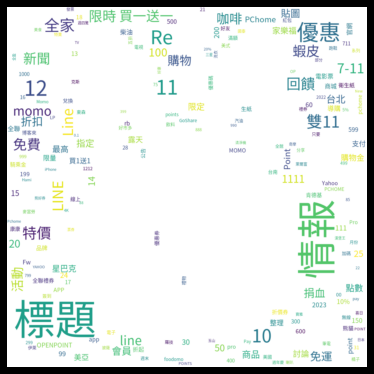

In [ ]:
font = r'msjh.ttc'
#想要文字雲出現的圖示
mask = imageio.imread('/content/drive/MyDrive/Colab Notebooks/wordcloud/pngtree-head-rabbit-sticker-png-image_8532602.png')
 
#背景顏色預設黑色，改為白色
#mark改用五月天的皇冠
#其他參數請自行參考wordcloud
my_wordcloud = WordCloud(background_color="white",mask=mask,font_path=font_path,collocations=False, width=00, height=2400, margin=2)  
my_wordcloud.generate_from_frequencies(frequencies=Counter(word))
 
#產生圖片
plt.figure( figsize=(5,5), facecolor='k')
plt.imshow(my_wordcloud,interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
#顯示用
plt.show()